In [2]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
env = gym.make('gym_pagination:pagination-v0', p_dist=[0, 0, 0, 0, 0, 1, 0, 0, 0, 0], r_dist=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
class random_policy():
    def predict(self, observation):
        return np.random.randint(0, 6)
    
    def train(self, action, observation, new_observation, reward, done, info):
        pass


In [5]:
policy = random_policy()

rewards = []
for episode in range(1000):

    obs = env.reset()
    total_reward = 0
    done = False
    while not done:

        # pick action
        a = policy.predict(obs)

        # make action
        new_obs, reward, done, info = env.step(a)
        total_reward += reward

        # update policy (if applicable)
        policy.train(a, obs, new_obs, reward, done, info)

        obs = new_obs
        
    rewards.append(total_reward)

31

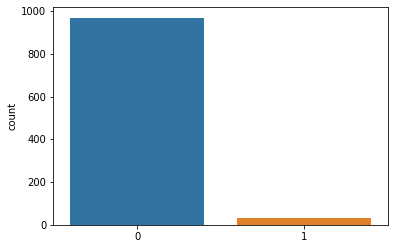

In [6]:
sns.countplot(x=rewards)
np.sum(rewards)

# Now we will attempt with a reinforcement learning agent

In [53]:
import operator
class reinforcement_learning_policy():
    def __init__(self, lr=0.95, gamma=0.9, exploration=0.05):
        self.lr = lr
        self.gamma = gamma
        self.exploration = exploration
        self.qtable = dict()
        
        self.replay = []
        
        for i in range(2): # observation space
            self.qtable[i] = dict()
            for j in range(6): # action space
                self.qtable[i][j] = np.random.rand()
                
    
    def predict(self, observation):
        
        if np.random.rand() < self.exploration:
            return np.random.randint(0,6)
        
        max_a = max(self.qtable[observation].items(), key=operator.itemgetter(1))[0]
        # just returning max_a would be a greedy policy
              
            
        return max_a
    
    def train(self, action, observation, new_observation, reward, done):
        if not done:
            self.replay.append((observation, action, new_observation, reward))
        else:
            if (self.qtable[observation][action] < 0.05):
                self.qtable[observation][action] = 0
            #print('training')
            #print(f'{self.lr} * {self.qtable[observation][action]} + {reward} = {self.lr * self.qtable[observation][action] + reward}')            
            self.qtable[observation][action] = self.lr * self.qtable[observation][action] + reward
            self.replay.append((observation, action, new_observation, reward))

            for i in range(len(self.replay) -2 , 0, -1):
                obs, act, n_obs, reward = self.replay[i]
                _, n_act, _, _ = self.replay[i + 1]
                
                #print(f'self.qtable[{obs}][{act}] = {self.qtable[obs][act]} * {self.lr} + {reward} + {self.gamma} * {self.qtable[n_obs][n_act]} = {self.qtable[obs][act] * self.lr + reward + self.gamma * self.qtable[n_obs][n_act]}')
                self.qtable[obs][act] = self.qtable[obs][act] * self.lr + reward + self.gamma * self.qtable[n_obs][n_act]
                
        self.replay = []


In [54]:
policy = reinforcement_learning_policy()



In [55]:
rewards = []
for episode in range(1000):

    obs = env.reset()
    total_reward = 0
    done = False
    obs = 0
    while not done:

        # pick action
        a = policy.predict(obs)

        # make action
        new_obs, reward, done, info = env.step(a)
        new_obs = info['page_no']
                
        total_reward += reward
        

        # update policy (if applicable)
        policy.train(a, obs, new_obs, reward, done)

        obs = new_obs
        
    rewards.append(total_reward)

912

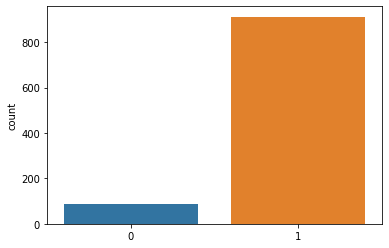

In [56]:
sns.countplot(x=rewards)
np.sum(rewards)

In [51]:
fails = 0
for i in range(1000):
    if policy.predict(1) != 0:
        fails += 1
print(fails)

42


In [35]:
policy.predict(0)

5